In [1]:
##############################
#Standard & Poor 500 EDA     #
#Maintainer: Christopher Chan#
#Version: 0.0.3              #
#Date: 2023-01-22            #
##############################

import os, sys, re
import statsmodels
import scipy
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import date, datetime


%matplotlib inline

data_dir = os.path.abspath("../data")
sp500_df = pd.read_csv(os.path.join(data_dir, "raw", "SP_500","sp500_stocks.csv"), sep = ",")
sp500_comp_df = pd.read_csv(os.path.join(data_dir, "raw", "SP_500", "sp500_companies.csv"), sep = ",")

sp500_df = pd.merge(sp500_df, sp500_comp_df, on = "Symbol", how = "inner")

sp500_df["Date"] = sp500_df["Date"].str.replace(r"\s.+", "", regex = True)
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"], yearfirst = True, errors = "raise")

# Set Datetype

uniq_count = len(sp500_df["Symbol"].unique())
print(f"There are {uniq_count} unique companies")

sp500_df.sample(n = 5)

There are 495 unique companies


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
655173,2016-08-03,FE,26.239082,33.060001,33.279999,32.770000,32.939999,4119700.0,NYQ,FirstEnergy Corp.,...,41.90,23890878464,3.664000e+09,0.112,Akron,OH,United States,12395.0,"FirstEnergy Corp., through its subsidiaries, g...",0.000687
1549548,2021-01-26,VMC,147.497238,150.500000,158.029999,150.220001,158.029999,695500.0,NYQ,Vulcan Materials Company (Holdi,...,176.67,23444992000,1.510800e+09,0.436,Birmingham,AL,United States,11912.0,"Vulcan Materials Company, together with its su...",0.000674
1505388,2015-03-27,UPS,78.345078,96.589996,96.879997,96.320000,96.739998,2506900.0,NYQ,"United Parcel Service, Inc.",...,176.15,153099354112,1.686200e+10,0.042,Atlanta,GA,United States,500000.0,"United Parcel Service, Inc. provides letter an...",0.004404
208385,2015-12-08,WRB,20.500858,24.719999,25.013332,24.662222,24.928888,1029600.0,NYQ,W.R. Berkley Corporation,...,69.80,18530226176,1.714503e+09,0.124,Greenwich,CT,United States,7681.0,"W. R. Berkley Corporation, an insurance holdin...",0.000533
1243776,2019-08-21,PGR,69.737038,77.300003,77.669998,77.019997,77.459999,1523900.0,NYQ,Progressive Corporation (The),...,125.92,73587646464,1.899900e+09,0.078,Mayfield,OH,United States,49077.0,"The Progressive Corporation, an insurance hold...",0.002117


## Mission
1. Explore different timeseries for different industries
2. Explore Decomposed timeseries for selected industries
3. Generate Research Question from Exploratory Data Analysis!

In [2]:
sp500_df["Sector"].unique()

array(['Industrials', 'Healthcare', 'Technology',
       'Communication Services', 'Consumer Defensive',
       'Consumer Cyclical', 'Utilities', 'Financial Services',
       'Basic Materials', 'Real Estate', 'Energy'], dtype=object)

### Let's subset for SECTOR: Financial Services and 

In [3]:
sp500_fin = sp500_df[sp500_df["Sector"] == "Financial Services"]
sp500_tech = sp500_df[sp500_df["Sector"] == "Technology"]

sp500_fin.sort_values(by = ["Ebitda"], ascending = False)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
108370,2023-01-18,AIG,62.209999,62.209999,64.029999,62.130001,63.700001,3565300.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106177,2014-05-02,AIG,43.663116,52.349998,53.299999,52.189999,52.970001,8452800.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106187,2014-05-16,AIG,43.788223,52.500000,52.910000,52.029999,52.910000,7414000.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106186,2014-05-15,AIG,44.088478,52.860001,53.570000,52.240002,53.279999,8794100.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106185,2014-05-14,AIG,44.530548,53.389999,54.000000,53.150002,53.939999,5728800.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622291,2023-01-12,ZION,51.450001,51.450001,52.259998,51.389999,51.580002,1295200.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622292,2023-01-13,ZION,51.389999,51.389999,51.439999,49.650002,50.680000,1018700.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622293,2023-01-17,ZION,50.860001,50.860001,51.220001,50.320000,51.150002,1674600.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622294,2023-01-18,ZION,48.259998,48.259998,50.580002,48.200001,50.549999,1804500.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223


In [4]:
sp500_fin.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

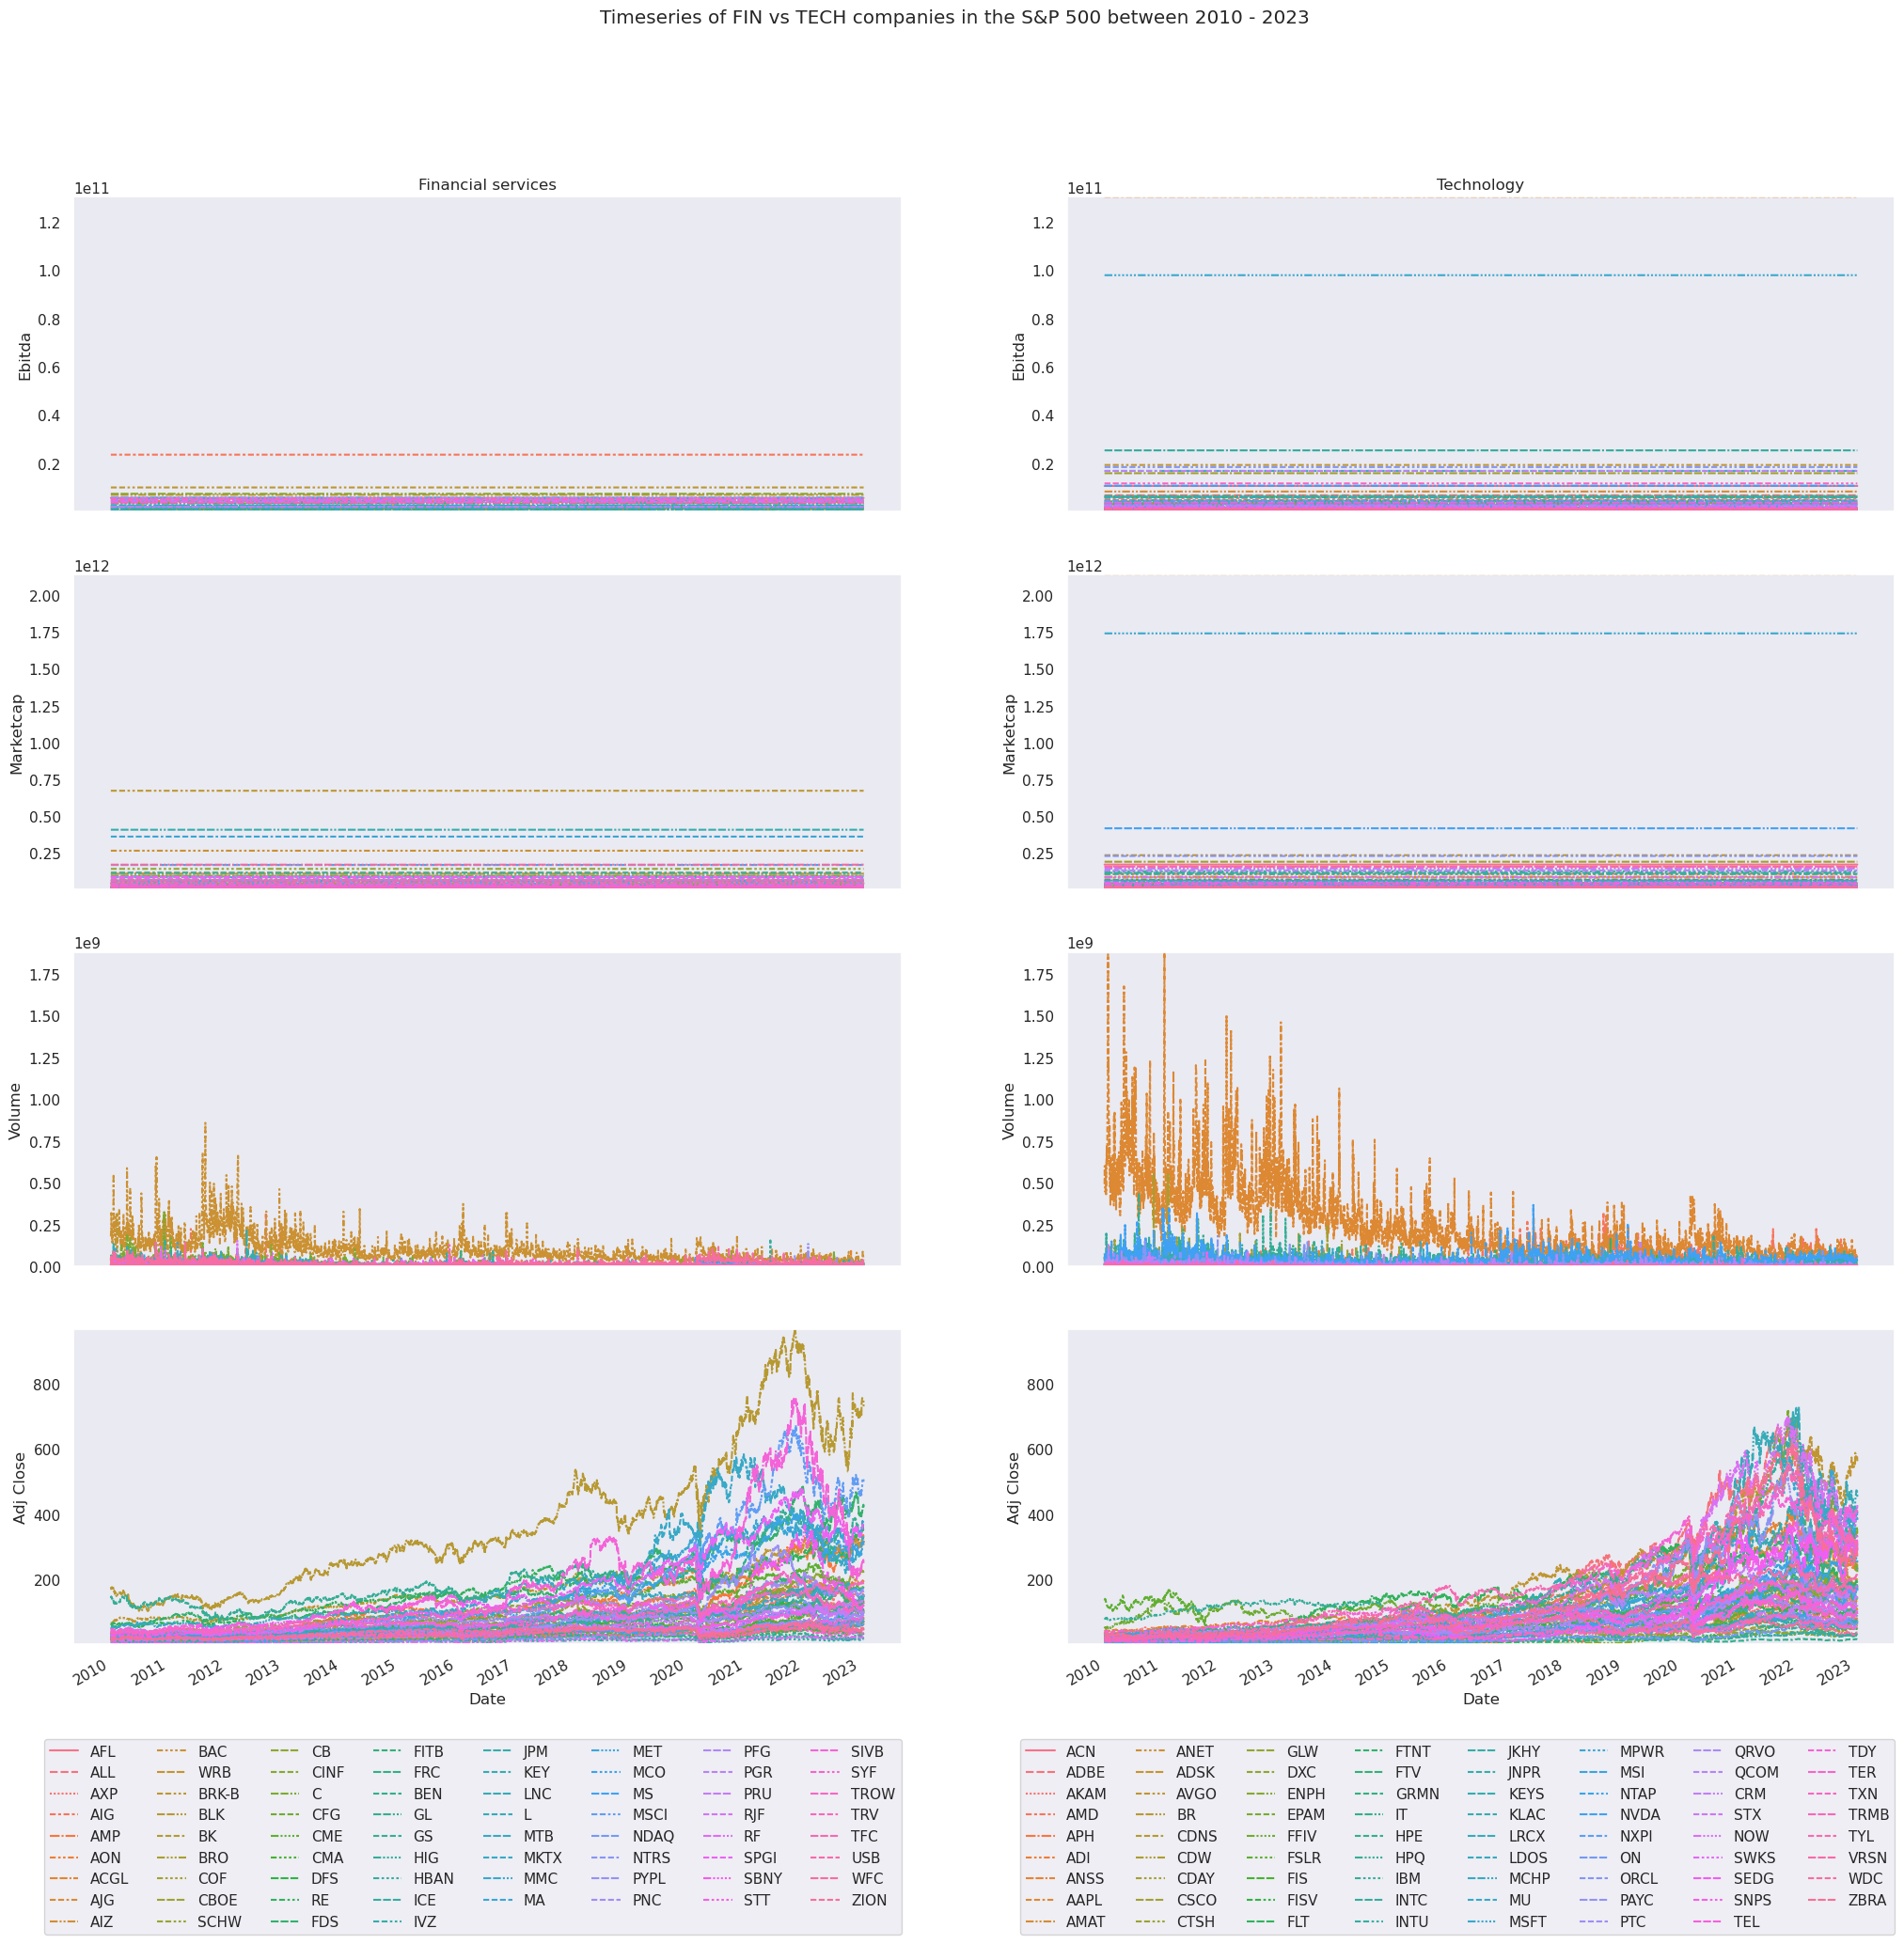

In [190]:
sns.set_theme(context = "notebook", style = "darkgrid", palette = "pastel")

fig, axes = plt.subplots(4, 2, figsize = (25, 20), sharex = True)
fig.suptitle("Timeseries of FIN vs TECH companies in the S&P 500 between 2010 - 2023")

axes[0, 0].set_ylim(min(list(sp500_fin["Ebitda"]) + list(sp500_tech["Ebitda"])), 
                    max(list(sp500_fin["Ebitda"]) + list(sp500_tech["Ebitda"])))
axes[0, 1].set_ylim(min(list(sp500_fin["Ebitda"]) + list(sp500_tech["Ebitda"])), 
                    max(list(sp500_fin["Ebitda"]) + list(sp500_tech["Ebitda"])))

axes[1, 0].set_ylim(min(list(sp500_fin["Marketcap"]) + list(sp500_tech["Marketcap"])), 
                    max(list(sp500_fin["Marketcap"]) + list(sp500_tech["Marketcap"])))
axes[1, 1].set_ylim(min(list(sp500_fin["Marketcap"]) + list(sp500_tech["Marketcap"])), 
                    max(list(sp500_fin["Marketcap"]) + list(sp500_tech["Marketcap"])))

axes[2, 0].set_ylim(min(list(sp500_fin["Volume"]) + list(sp500_tech["Volume"])), 
                    max(list(sp500_fin["Volume"]) + list(sp500_tech["Volume"])))
axes[2, 1].set_ylim(min(list(sp500_fin["Volume"]) + list(sp500_tech["Volume"])), 
                    max(list(sp500_fin["Volume"]) + list(sp500_tech["Volume"])))

axes[3, 0].set_ylim(min(list(sp500_fin["Adj Close"]) + list(sp500_tech["Adj Close"])), 
                    max(list(sp500_fin["Adj Close"]) + list(sp500_tech["Adj Close"])))
axes[3, 1].set_ylim(min(list(sp500_fin["Adj Close"]) + list(sp500_tech["Adj Close"])), 
                    max(list(sp500_fin["Adj Close"]) + list(sp500_tech["Adj Close"])))

# Financial services on left column
EBITDA_FINtime = sns.lineplot(data = sp500_fin, x = "Date", y = "Ebitda", ax = axes[0, 0],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

CAP_FINtime = sns.lineplot(data = sp500_fin, x = "Date", y = "Marketcap", ax = axes[1, 0],
                        hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

Volume_FINtime = sns.lineplot(data = sp500_fin, x = "Date", y = "Volume", ax = axes[2, 0],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

AClose_FINtime = sns.lineplot(data = sp500_fin, x = "Date", y = "Adj Close", ax = axes[3, 0],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = True)

# Technology on 
EBITDA_TECHtime = sns.lineplot(data = sp500_tech, x = "Date", y = "Ebitda", ax = axes[0, 1],
                           hue = sp500_tech["Symbol"], style = sp500_tech["Symbol"], legend = False).sharey(EBITDA_FINtime)

CAP_TECHtime = sns.lineplot(data = sp500_tech, x = "Date", y = "Marketcap", ax = axes[1, 1],
                        hue = sp500_tech["Symbol"], style = sp500_tech["Symbol"], legend = False).sharey(CAP_FINtime)

Volume_TECHtime = sns.lineplot(data = sp500_tech, x = "Date", y = "Volume", ax = axes[2, 1],
                           hue = sp500_tech["Symbol"], style = sp500_tech["Symbol"], legend = False).sharey(Volume_FINtime)

AClose_TECHtime = sns.lineplot(data = sp500_tech, x = "Date", y = "Adj Close", ax = axes[3, 1],
                           hue = sp500_tech["Symbol"], style = sp500_tech["Symbol"], legend = True).sharey(AClose_FINtime)


axes[3, 0].legend(bbox_to_anchor = (1, -0.3), borderaxespad = 0, ncol = 8)
axes[0, 0].set_title("Financial services")

axes[3, 1].legend(bbox_to_anchor = (1, -0.3), borderaxespad = 0, ncol = 8)
axes[0, 1].set_title("Technology")

for ax in axes[:, 0]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')
 
for ax in axes[:, 1]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')   

plt.savefig("../reports/figures/FINvsTECH_s&p500.png", format = "png", bbox_inches = "tight")

plt.show()

In [ ]:
sp500_fin

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
36124,2010-01-04,AFL,17.580524,23.785000,23.850000,23.250000,23.250000,4724000.0,NYQ,AFLAC Incorporated,...,70.68,44663824384,5.588000e+09,-0.080,Columbus,GA,United States,12447.0,"Aflac Incorporated, through its subsidiaries, ...",0.001285
36125,2010-01-05,AFL,18.090536,24.475000,24.540001,23.530001,23.745001,7930600.0,NYQ,AFLAC Incorporated,...,70.68,44663824384,5.588000e+09,-0.080,Columbus,GA,United States,12447.0,"Aflac Incorporated, through its subsidiaries, ...",0.001285
36126,2010-01-06,AFL,18.249445,24.690001,24.915001,24.360001,24.915001,5851600.0,NYQ,AFLAC Incorporated,...,70.68,44663824384,5.588000e+09,-0.080,Columbus,GA,United States,12447.0,"Aflac Incorporated, through its subsidiaries, ...",0.001285
36127,2010-01-07,AFL,18.445324,24.955000,25.000000,24.500000,24.705000,5535800.0,NYQ,AFLAC Incorporated,...,70.68,44663824384,5.588000e+09,-0.080,Columbus,GA,United States,12447.0,"Aflac Incorporated, through its subsidiaries, ...",0.001285
36128,2010-01-08,AFL,18.260532,24.705000,24.830000,24.375000,24.830000,4393400.0,NYQ,AFLAC Incorporated,...,70.68,44663824384,5.588000e+09,-0.080,Columbus,GA,United States,12447.0,"Aflac Incorporated, through its subsidiaries, ...",0.001285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622291,2023-01-12,ZION,51.450001,51.450001,52.259998,51.389999,51.580002,1295200.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622292,2023-01-13,ZION,51.389999,51.389999,51.439999,49.650002,50.680000,1018700.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622293,2023-01-17,ZION,50.860001,50.860001,51.220001,50.320000,51.150002,1674600.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622294,2023-01-18,ZION,48.259998,48.259998,50.580002,48.200001,50.549999,1804500.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223


: 

: 

: 

In [ ]:
# Subset necessary columns and transform datemean column as index
Daily_fin = sp500_fin.loc[:, ["Date", "Adj Close", "Volume", "Ebitda", "Marketcap"]]
Daily_fin = Daily_fin.set_index("Date")

Daily_tech = sp500_tech.loc[:, ["Date", "Adj Close", "Volume", "Ebitda", "Marketcap"]]
Daily_tech = Daily_tech.set_index("Date")

# Resample by daily mean
Daily_mean_fin = Daily_fin.resample("D").apply(np.mean).ffill()
Daily_mean_tech = Daily_tech.resample("D").apply(np.mean).ffill()
Monthly_mean_fin = Daily_fin.resample("M").apply(np.mean).ffill()
Monthly_mean_tech = Daily_tech.resample("M").apply(np.mean).ffill()

Daily_mean = pd.merge(Daily_mean_fin, Daily_mean_tech, how = "outer", on = "Date", suffixes = ["_fin", "_tech"])
Monthly_mean = pd.merge(Monthly_mean_fin, Monthly_mean_tech, how = "outer", on = "Date", suffixes = ["_fin", "_tech"])

Daily_mean

,Adj Close_fin,Volume_fin,Ebitda_fin,Marketcap_fin,Adj Close_tech,Volume_tech,Ebitda_tech,Marketcap_tech
Date,,,,,,,,
2010-01-04,28.656878,9.004185e+06,3.825168e+09,6.650679e+10,23.573266,1.754950e+07,7.295892e+09,1.101878e+11
2010-01-05,28.876621,1.135859e+07,3.825168e+09,6.650679e+10,23.573272,2.086751e+07,7.295892e+09,1.101878e+11
2010-01-06,28.839110,1.015646e+07,3.825168e+09,6.650679e+10,23.547632,1.797015e+07,7.295892e+09,1.101878e+11
2010-01-07,29.301772,1.499472e+07,3.825168e+09,6.650679e+10,23.509208,1.691324e+07,7.295892e+09,1.101878e+11
2010-01-08,29.345612,1.026857e+07,3.825168e+09,6.650679e+10,23.662168,1.622968e+07,7.295892e+09,1.101878e+11
...,...,...,...,...,...,...,...,...
2023-01-15,147.354411,5.446924e+06,3.825168e+09,6.650679e+10,173.337287,4.975186e+06,7.295892e+09,1.101878e+11
2023-01-16,147.354411,5.446924e+06,3.825168e+09,6.650679e+10,173.337287,4.975186e+06,7.295892e+09,1.101878e+11
2023-01-17,146.765441,5.345697e+06,3.825168e+09,6.650679e+10,173.958142,5.524126e+06,7.295892e+09,1.101878e+11


: 

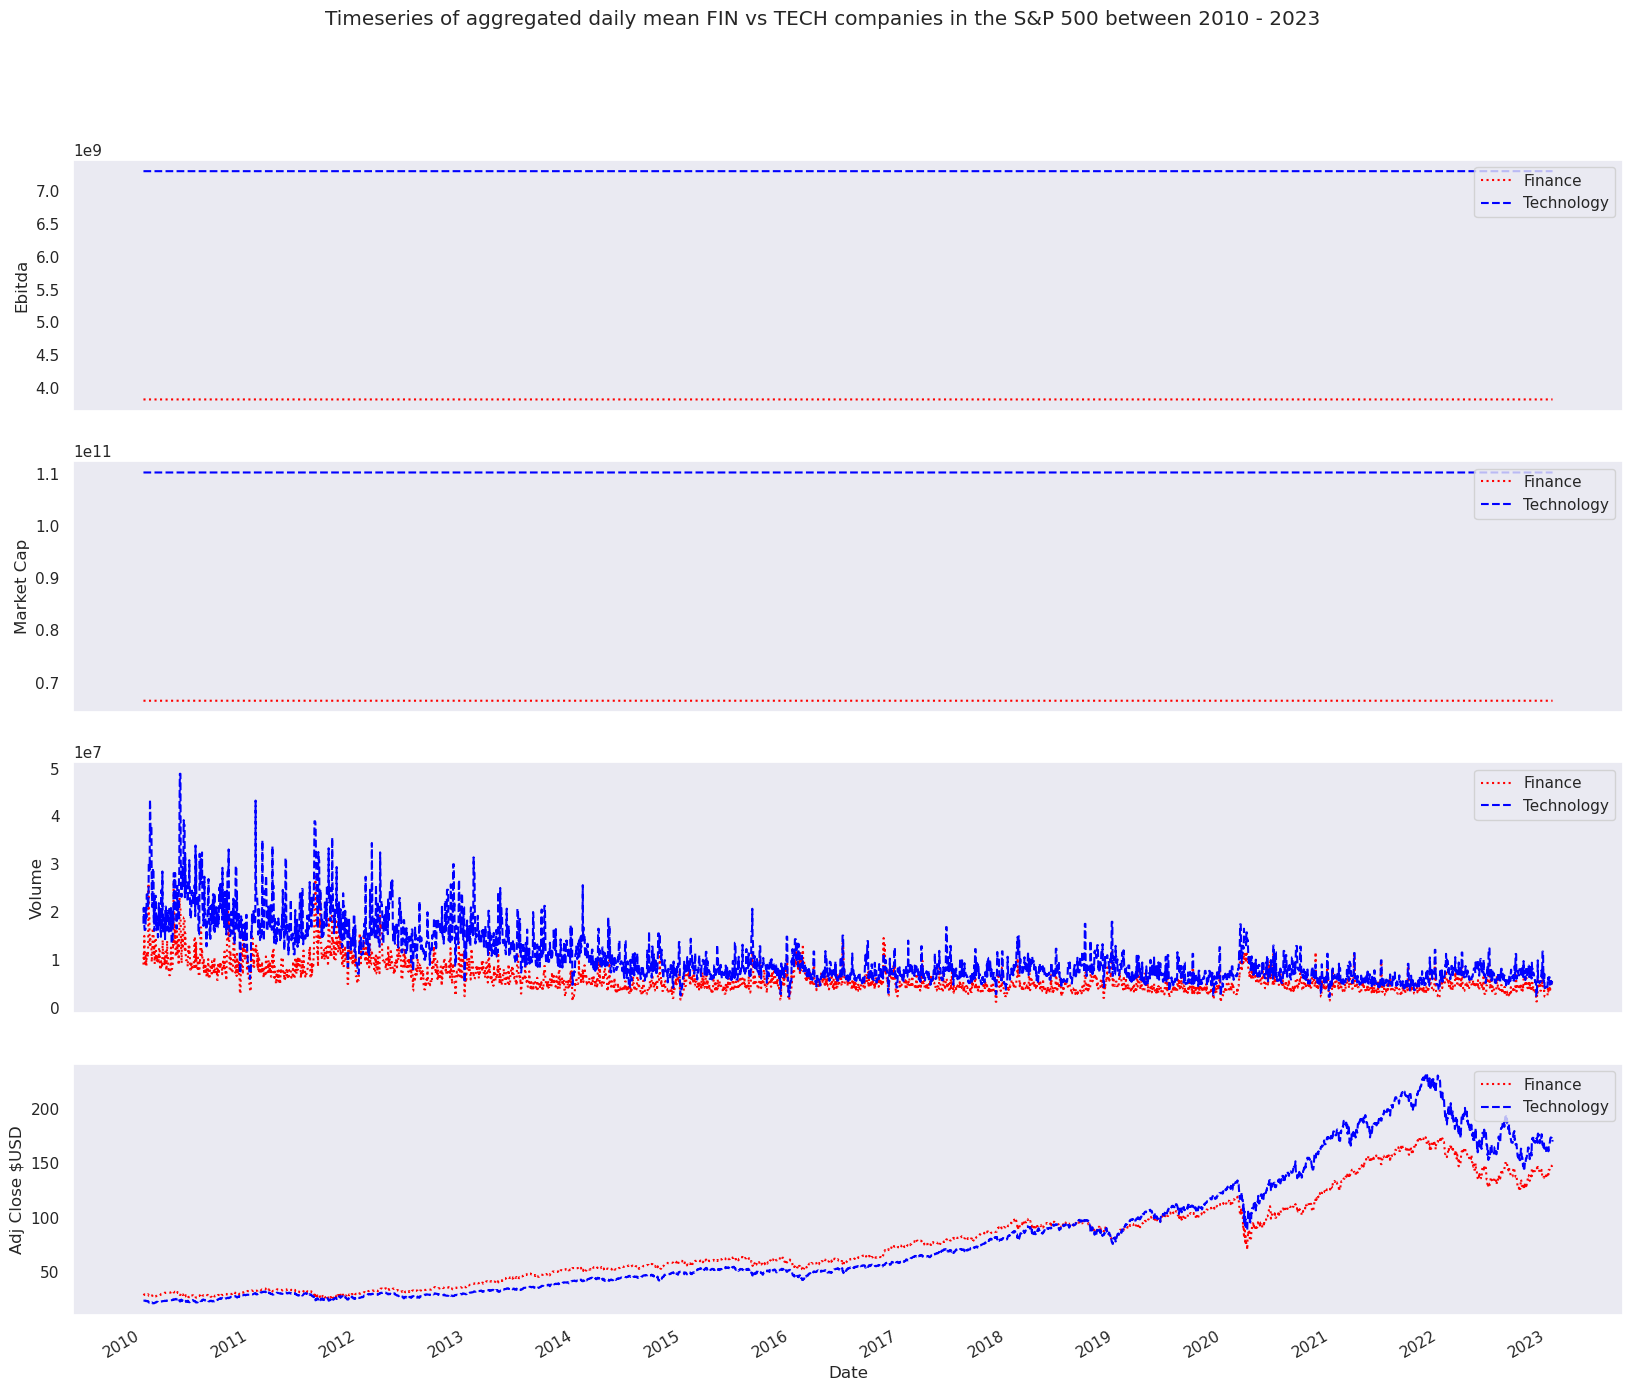

: 

In [ ]:
from matplotlib.lines import Line2D

sns.set_theme(context = "notebook", style = "darkgrid", palette = "viridis")

fig, axes = plt.subplots(4, 1, figsize = (20, 15), sharex = True)

fig.suptitle("Timeseries of aggregated daily mean FIN vs TECH companies in the S&P 500 between 2010 - 2023")

sns.lineplot(data = Daily_mean, x = "Date", y = "Ebitda_fin", ax = axes[0], legend = False, color = "red", linestyle = ":")
sns.lineplot(data = Daily_mean, x = "Date", y = "Ebitda_tech", ax = axes[0], legend = False, color = "blue", linestyle = "--")
sns.lineplot(data = Daily_mean, x = "Date", y = "Marketcap_fin", ax = axes[1], legend = False, color = "red", linestyle = ":")
sns.lineplot(data = Daily_mean, x = "Date", y = "Marketcap_tech", ax = axes[1], legend = False, color = "blue", linestyle = "--")
sns.lineplot(data = Daily_mean, x = "Date", y = "Volume_fin", ax = axes[2], legend = False, color = "red", linestyle = ":")
sns.lineplot(data = Daily_mean, x = "Date", y = "Volume_tech", ax = axes[2], legend = False, color = "blue", linestyle = "--")
sns.lineplot(data = Daily_mean, x = "Date", y = "Adj Close_fin", ax = axes[3], legend = False, color = "red", linestyle = ":")
sns.lineplot(data = Daily_mean, x = "Date", y = "Adj Close_tech", ax = axes[3], legend = False, color = "blue", linestyle = "--")

axes[0].set_ylabel("Ebitda")
axes[1].set_ylabel("Market Cap")
axes[2].set_ylabel("Volume")
axes[3].set_ylabel("Adj Close $USD")

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')

custom_lines = [Line2D([0], [0], linestyle = ":", color = "red"),
                Line2D([0], [0], linestyle = "--", color = "blue")]

for ax in axes:
    ax.legend(custom_lines, ["Finance" , "Technology"], loc = "upper right")

#plt.legend([axes[0], axes[1], axes[2]])
plt.savefig("../reports/figures/FINvsTECH_Dailymean.png", format = "png", bbox_inches = "tight")

plt.show()

### Descriptive Timeseries: Monthly mean LOESS based Decomposition

Plots for Monthly mean LOESS Decomposition exist


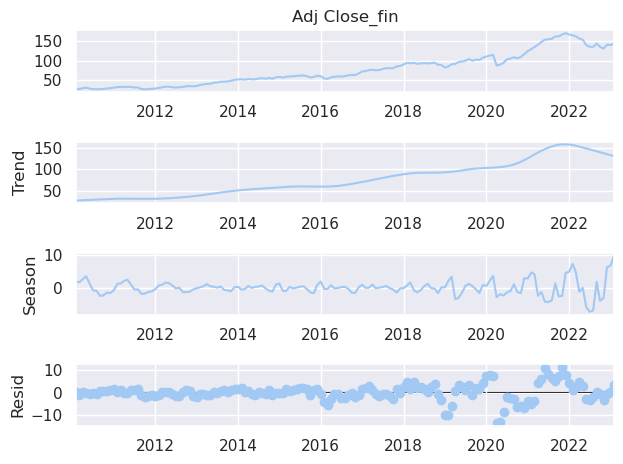

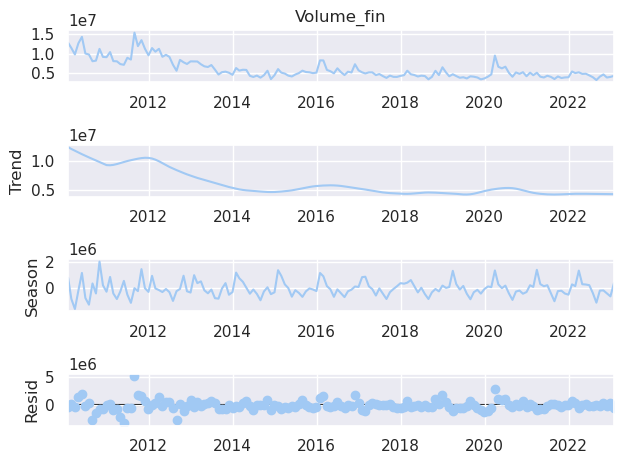

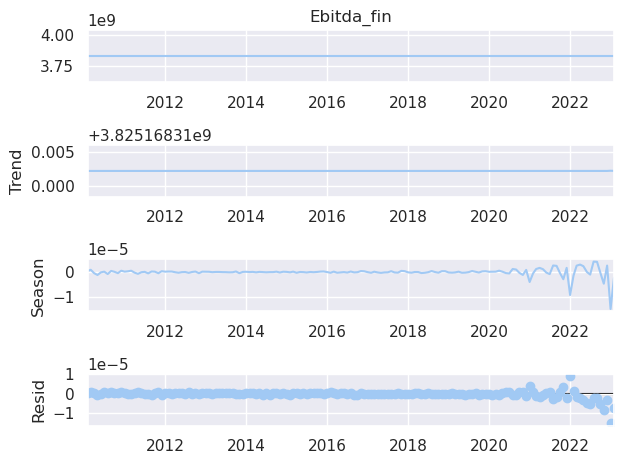

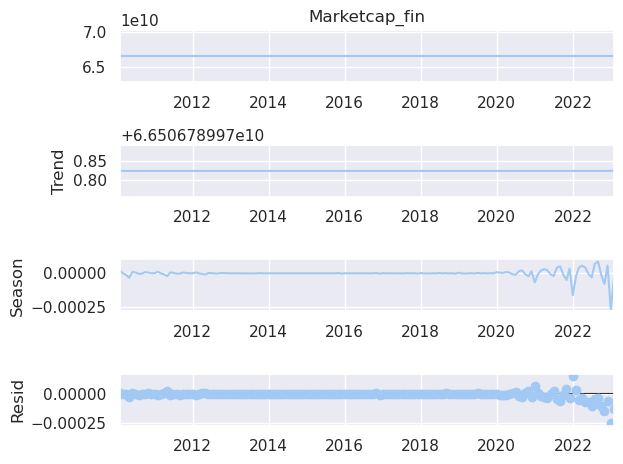

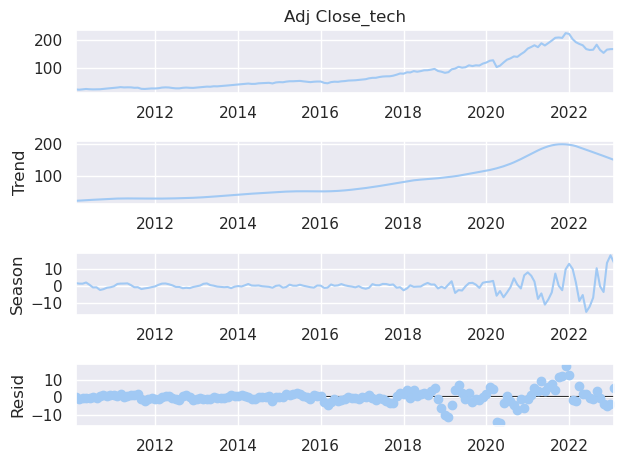

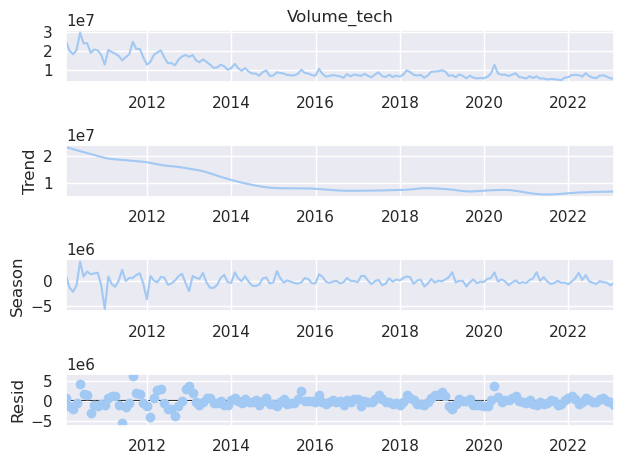

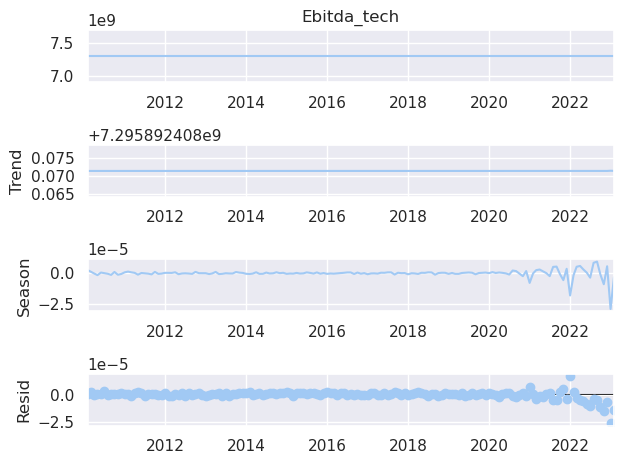

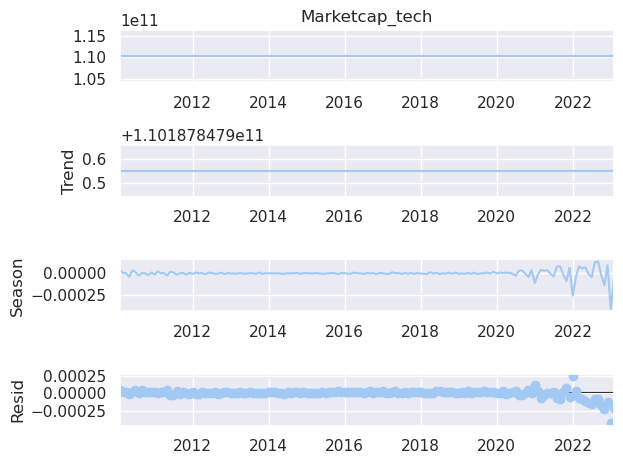

: 

In [ ]:
from statsmodels.tsa import seasonal
sns.set_theme(context = "notebook", style = "darkgrid", palette = "pastel")

if os.path.exists("../reports/figures/Monthly_LOESS_DeCompose"):
    print("Plots for Monthly mean LOESS Decomposition exist")
else:
    os.makedirs("../reports/figures/Monthly_LOESS_DeCompose")

Decomposed_Season = pd.DataFrame({
    "Date": Monthly_mean.index,
    "Adj_Close_FIN": np.nan,
    "Volume_FIN": np.nan,
    "Ebitda_FIN": np.nan,
    "Marketcap_FIN": np.nan,
    "Adj_Close_TECH": np.nan,
    "Volume_TECH": np.nan,
    "Ebitda_TECH": np.nan,
    "Marketcap_TECH": np.nan
})

Decomposed_Season = Decomposed_Season.set_index("Date")

for idx, stat in enumerate(Monthly_mean.columns):
    LOESS = seasonal.STL(Monthly_mean[stat], period = 12, robust = False).fit()
    Decomposed_Season.iloc[:, idx] = LOESS.seasonal

    LOESS.plot()
    plt.savefig(f"../reports/figures/Monthly_LOESS_Decompose/LOESS_{stat}.png", format = "png", bbox_inches = "tight")


In [ ]:
Decomposed_Season

,Adj_Close_FIN,Volume_FIN,Ebitda_FIN,Marketcap_FIN,Adj_Close_TECH,Volume_TECH,Ebitda_TECH,Marketcap_TECH
Date,,,,,,,,
2010-01-31,1.866498,8.035525e+05,4.149258e-07,1.817613e-05,1.789333,8.345708e+05,2.498149e-06,0.000036
2010-02-28,1.727226,-8.060216e+05,9.261794e-07,7.795247e-07,1.483312,-1.324975e+06,1.266290e-06,0.000005
2010-03-31,2.633442,-1.573128e+06,-4.451300e-07,-1.182867e-05,1.469425,-2.169762e+06,-2.216734e-07,0.000001
2010-04-30,3.554973,-1.855573e+05,-1.159598e-06,-3.278760e-05,2.163801,-9.561923e+05,-1.530557e-06,-0.000038
2010-05-31,1.354945,1.175411e+06,-1.081166e-07,1.028172e-05,0.770991,3.663302e+06,5.353543e-07,0.000032
...,...,...,...,...,...,...,...,...
2022-09-30,-3.886190,-1.705280e+05,-2.839415e-07,-9.602772e-06,-0.117544,-1.008399e+05,-9.546190e-07,-0.000022
2022-10-31,-3.063378,-1.571069e+05,-4.673446e-06,-7.819347e-05,-3.468939,-3.164485e+05,-8.926911e-06,-0.000137
2022-11-30,6.240355,-3.754827e+05,2.620521e-06,5.671553e-05,13.739963,-3.929119e+05,5.628801e-06,0.000093


: 

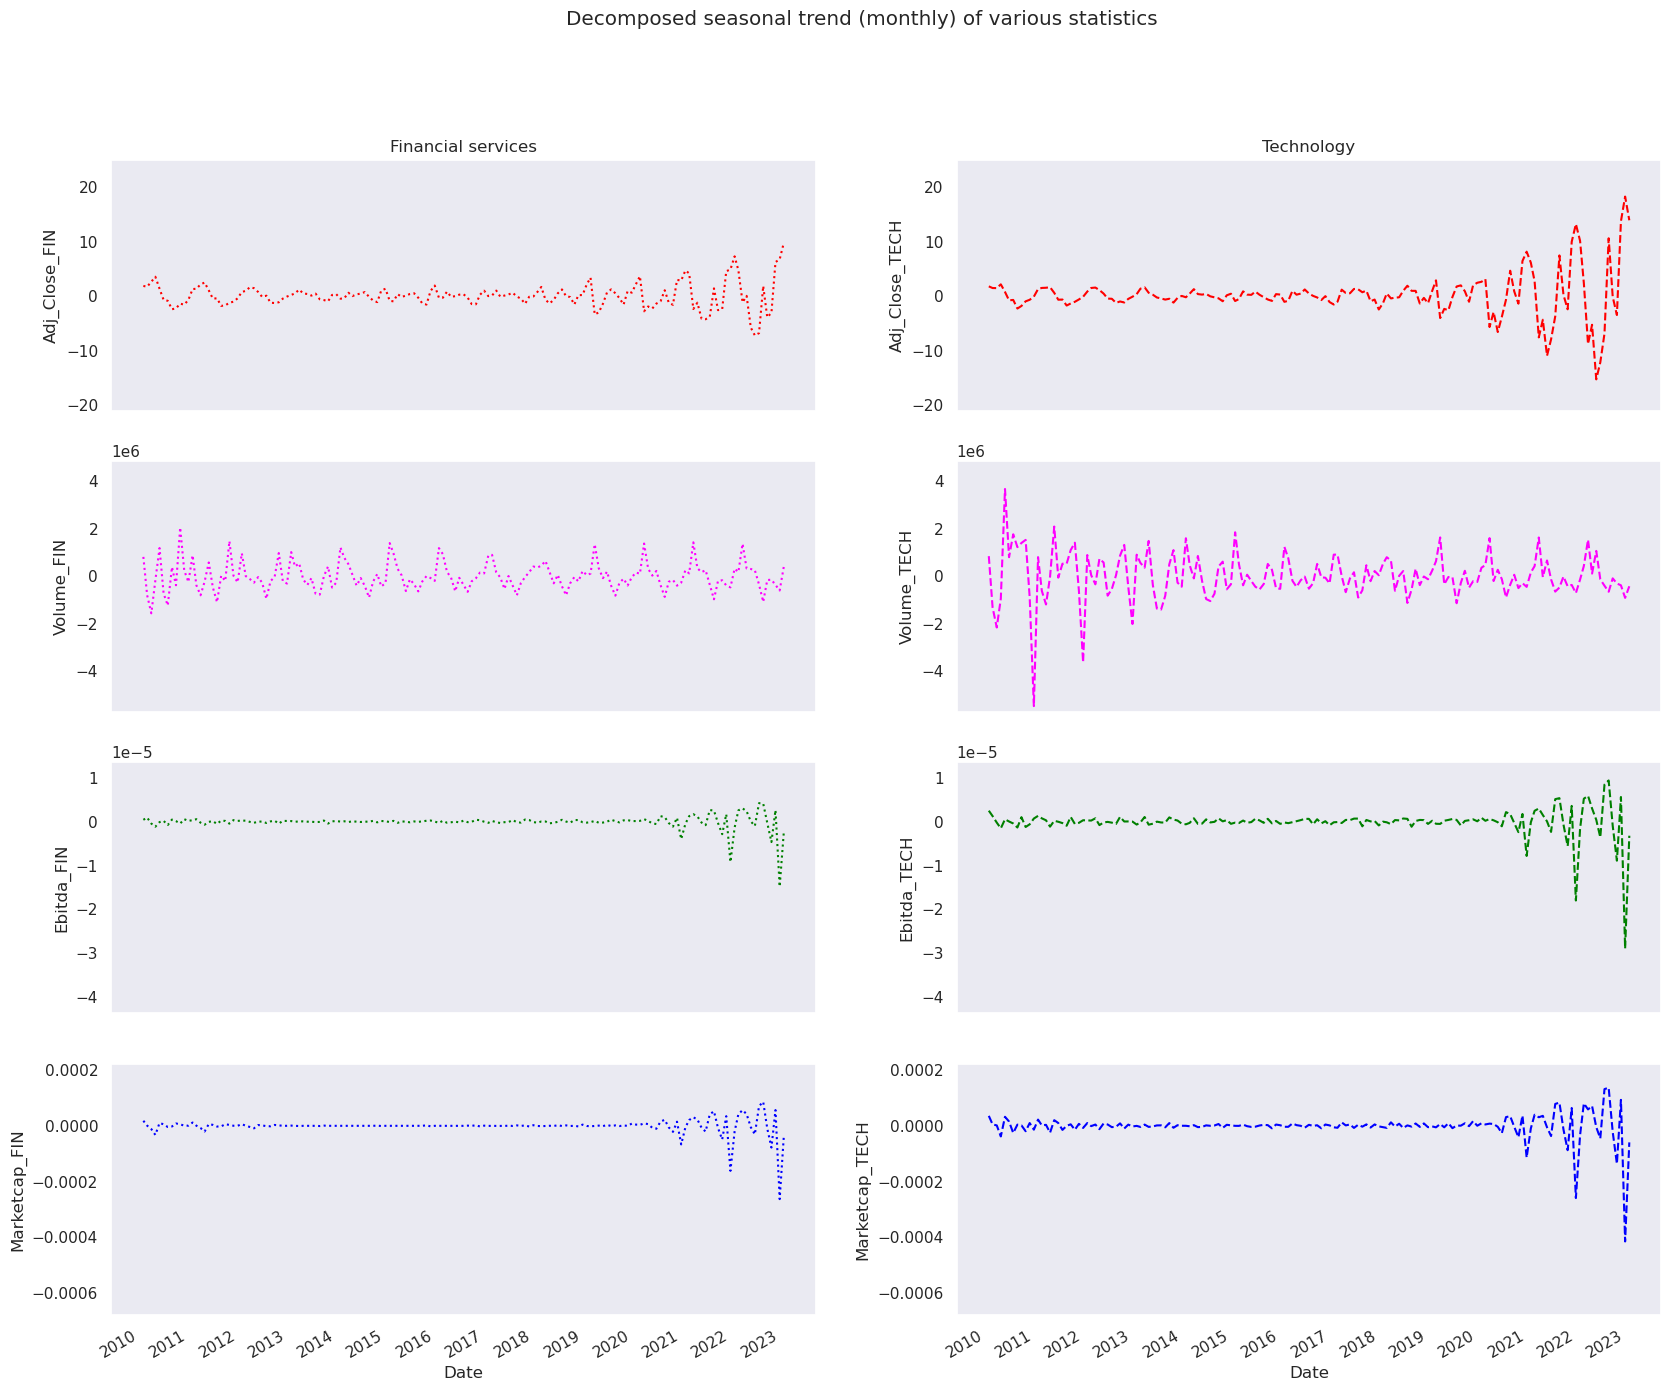

: 

In [ ]:
sns.set_theme(context = "notebook", style = "darkgrid", palette = "pastel")

fig, axes = plt.subplots(4, 2, figsize = (20, 15), sharex = True)
fig.suptitle("Decomposed seasonal trend (monthly) of various statistics")

axes[0, 0].set_ylim(min(Decomposed_Season["Adj_Close_FIN"] + Decomposed_Season["Adj_Close_TECH"]), 
                    max(Decomposed_Season["Adj_Close_FIN"] + Decomposed_Season["Adj_Close_TECH"]))
axes[0, 1].set_ylim(min(Decomposed_Season["Adj_Close_FIN"] + Decomposed_Season["Adj_Close_TECH"]), 
                    max(Decomposed_Season["Adj_Close_FIN"] + Decomposed_Season["Adj_Close_TECH"]))

axes[1, 0].set_ylim(min(Decomposed_Season["Volume_FIN"] + Decomposed_Season["Volume_TECH"]), 
                    max(Decomposed_Season["Volume_FIN"] + Decomposed_Season["Volume_TECH"]))
axes[1, 1].set_ylim(min(Decomposed_Season["Volume_FIN"] + Decomposed_Season["Volume_TECH"]), 
                    max(Decomposed_Season["Volume_FIN"] + Decomposed_Season["Volume_TECH"]))

axes[2, 0].set_ylim(min(Decomposed_Season["Ebitda_FIN"] + Decomposed_Season["Ebitda_TECH"]), 
                    max(Decomposed_Season["Ebitda_FIN"] + Decomposed_Season["Ebitda_TECH"]))
axes[2, 1].set_ylim(min(Decomposed_Season["Ebitda_FIN"] + Decomposed_Season["Ebitda_TECH"]), 
                    max(Decomposed_Season["Ebitda_FIN"] + Decomposed_Season["Ebitda_TECH"]))

axes[3, 0].set_ylim(min(Decomposed_Season["Marketcap_FIN"] + Decomposed_Season["Marketcap_TECH"]), 
                    max(Decomposed_Season["Marketcap_FIN"] + Decomposed_Season["Marketcap_TECH"]))
axes[3, 1].set_ylim(min(Decomposed_Season["Marketcap_FIN"] + Decomposed_Season["Marketcap_TECH"]), 
                    max(Decomposed_Season["Marketcap_FIN"] + Decomposed_Season["Marketcap_TECH"]))

# Financial services on left column
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Adj_Close_FIN", ax = axes[0, 0], color = "red", linestyle = "dotted")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Volume_FIN", ax = axes[1, 0], color = "magenta", linestyle = "dotted")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Ebitda_FIN", ax = axes[2, 0], color = "green", linestyle = "dotted")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Marketcap_FIN", ax = axes[3, 0], color = "blue", linestyle = "dotted")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Adj_Close_TECH", ax = axes[0, 1], color = "red", linestyle = "dashed")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Volume_TECH", ax = axes[1, 1], color = "magenta", linestyle = "dashed")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Ebitda_TECH", ax = axes[2, 1], color = "green", linestyle = "dashed")
sns.lineplot(data = Decomposed_Season, x = "Date", y = "Marketcap_TECH", ax = axes[3, 1], color = "blue", linestyle = "dashed")

axes[0, 0].set_title("Financial services")
axes[0, 1].set_title("Technology")

for ax in axes[:, 0]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')
 
for ax in axes[:, 1]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')

plt.savefig("../reports/figures/Seasonal_decomp_FINvsTECH.png", format = "png", bbox_inches = "tight")